<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [8]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests
                

import pandas as pd

df = pd.read_csv('./data/job_listings.csv')

In [3]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
# Use Beautiful soup to extract text from html

def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()

df['clean_desc'] = df['description'].apply(clean_description)

In [22]:
df.head()

,Unnamed: 0,description,title,clean_desc,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:\nConceptual understanding in...,"[job, requirements:\nconceptual, understanding..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ...","[job, description\n\nas, data, scientist, 1,, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[data, scientist, working, consulting, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$4,969, $6,756, monthcontractunder, general, ..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations\...,"[location:, usa, \xe2\x80\x93, multiple, locat..."


In [19]:
# Remove the \n and the b' and b" from the text, that is all formatting from html
df['clean_desc'] = df['clean_desc'].str[2:]

In [151]:
# Get rid of the \n 

clean_list = []

for i in range(len(df['clean_desc'])):
    clean_list.append(str(df['clean_desc'][i]).replace('\\n', ' '))
                      
df['clean_desc'] = clean_list

In [152]:
df.head()

,Unnamed: 0,description,title,clean_desc,tokens,lemmas
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,"[job, requirements:, conceptual, understanding...","[job, requirement, conceptual, understanding, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[job, description, , data, scientist, 1,, hel...","[job, description, Data, scientist, 1, help, b..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[data, scientist, working, consulting, busines...","[Data, scientist, work, consult, business, res..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$4,969, $6,756, monthcontractunder, general, ...","[4,969, 6,756, monthcontractunder, general, su..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,"[location:, usa, \xe2\x80\x93, multiple, locat...","[location, USA, \xe2\x80\x93, multiple, locati..."


In [ ]:
# Clean the following 
'''
\\xe2\\x80\\x99
\\xc2\\xb7
\\xc2\\xbb
\\xe2\\x80\\x93
\\xe2\\x80\\x94
\\xe2\\x80\\x9c
\\xe2\\x80\\x9d
\\xef\\x83\\x98
'''


'''
replace({'\\n': ' ',
                                                       '\\xe2\\x80\\x99': ' ',
                                                        '\\xc2\\xb7': ' ',
                                                        '\\xc2\\xbb': ' ',
                                                        '\\xe2\\x80\\x93': ' ',
                                                        '\\xe2\\x80\\x94': ' ',
                                                        '\\xe2\\x80\\x9c': ' ',
                                                        '\\xe2\\x80\\x9d': ' ',
                                                        '\\xef\\x83\\x98': ' '
                                                       }))
'''

## 2) Use Spacy to tokenize the listings 

In [10]:
# Use spacy to tokenize the listings
from spacy.tokenizer import Tokenizer

# Define nlp model
nlp = spacy.load('en_core_web_lg')

# Define Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [48]:
# Tokenizer pipe

tokens = []

# Convert text to tokens, remove stop words and punctuation
for doc in tokenizer.pipe(df['clean_desc']):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [49]:
df.tokens.head()

0    [job, requirements:, conceptual, understanding...
1    [job, description,  , data, scientist, 1,, hel...
2    [data, scientist, working, consulting, busines...
3    [$4,969, $6,756, monthcontractunder, general, ...
4    [location:, usa, \xe2\x80\x93, multiple, locat...
Name: tokens, dtype: object

#### Perform Lemmatization

In [118]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # For loop to append lemmas to list, if not in stop list or punctuation or pronoun
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.is_currency == False) and (token.is_space == False):
            lemmas.append(token.lemma_)
    
    return lemmas

In [119]:
df['lemmas'] = df['clean_desc'].apply(get_lemmas)

In [120]:
df['lemmas'].head()

0    [job, requirement, conceptual, understanding, ...
1    [job, description, Data, scientist, 1, help, b...
2    [Data, scientist, work, consult, business, res...
3    [4,969, 6,756, monthcontractunder, general, su...
4    [location, USA, \xe2\x80\x93, multiple, locati...
Name: lemmas, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [127]:
# List text
text = df['clean_desc']

# Create the transformer - instantiate the model
vect = CountVectorizer(stop_words = 'english')

# Build the dictionary (vocab) for the corpus of text
vect.fit(text)

# Transform text - counts the instance of each word in the text
dtm = vect.transform(text)

In [128]:
# Get Word Counts for each document - easier way to read as a pandas df
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# Word count for each document
sum_doc = dtm.sum(axis=1)
sum_doc

0      168
1      744
2      150
3      314
4       48
      ... 
421    898
422    474
423    512
424    716
425    832
Length: 426, dtype: int64

## 4) Visualize the most common word counts

#### Create table with the most common words

In [106]:
# Sum columns to get word counts
dtm = dtm.append(dtm.sum(), ignore_index= True)
dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Save sum row
word_count = dtm.tail(1)

In [108]:
# Transpose
word_count = word_count.T

In [109]:
# Reset index to bring in words
word_count = word_count.reset_index()

In [110]:
# Rename columns for ease of reading
word_count.columns = ['word', 'frequency']

In [111]:
# Sort by most frequent
word_count = word_count.sort_values(by= ['frequency'], ascending = False)

In [113]:
# Save top 30 most common words
top_30 = word_count.head(30)
top_30

,word,frequency
2048,data,4466
2932,experience,1854
8465,xe2,1417
8348,x80,1404
1135,business,1212
8313,work,1161
7549,team,988
6722,science,958
4452,learning,919
550,analytics,736


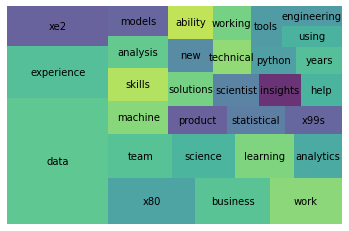

In [114]:
import squarify

# Plot Visual of top 30 most common words
squarify.plot(sizes= top_30['frequency'], label= top_30['word'], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [134]:
# Create custom tokenizer

def tokenize(text):
    
#     Use spacy
    doc = nlp(text)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.is_currency == False) and (token.is_space == False)]

In [135]:
# Imports done at top
# Use custom tokenizer defined above

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',
                        ngram_range= (1,3),
                        max_df= .97,
                        min_df= 2,
                        tokenizer = tokenize,
                        max_features = 5000
                       )

# Create a voacbulary (fit) and get word count (transform) in one step
dtm = tfidf.fit_transform(df['clean_desc'])

# Put in a pandas df
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,+,+ year,+ year experience,+ year hand,+ year industry,+ year professional,+ year relevant,+ year work,+ years\xe2\x80\x99,+ years\xe2\x80\x99 experience,...,you\xe2\x80\x99ll,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,zf,|,||
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027522,0.030043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.109636,0.119678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# Look at some of the tokens - first 100
list(dtm)[:100]

['+',
 '+ year',
 '+ year experience',
 '+ year hand',
 '+ year industry',
 '+ year professional',
 '+ year relevant',
 '+ year work',
 '+ years\\xe2\\x80\\x99',
 '+ years\\xe2\\x80\\x99 experience',
 '0',
 '0 2',
 '1',
 '1 +',
 '1 + year',
 '1 2',
 '1 year',
 '1 year experience',
 '10',
 '10 year',
 '100',
 '100,000',
 '12',
 '12 month',
 '15',
 '2',
 '2 +',
 '2 + year',
 '2 3',
 '2 4',
 '2 5',
 '2 year',
 '2 year experience',
 '2 years\\xe2\\x80\\x99',
 '20',
 '2018',
 '2019',
 '25',
 '3',
 '3 +',
 '3 + year',
 '3 5',
 '3 5 year',
 '3 year',
 '3 year experience',
 '3.0',
 '30',
 '3rd',
 '3rd party',
 '4',
 '4 +',
 '4 + year',
 '4 year',
 '4 year experience',
 '40',
 '401(k',
 '401k',
 '5',
 '5 +',
 '5 + year',
 '5 7',
 '5 7 year',
 '5 year',
 '5 year experience',
 '50',
 '500',
 '500 company',
 '6',
 '6 +',
 '6 + year',
 '600',
 '600 city',
 '600 city world',
 '7',
 '7 year',
 '7 year experience',
 '8',
 '\\xc2\\xb7',
 '\\xc2\\xbb',
 '\\xc2\\xbb experience',
 '\\xe2\\x80\\x93',
 '\\x

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [137]:
dtm.head()

,+,+ year,+ year experience,+ year hand,+ year industry,+ year professional,+ year relevant,+ year work,+ years\xe2\x80\x99,+ years\xe2\x80\x99 experience,...,you\xe2\x80\x99ll,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,zf,|,||
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027522,0.030043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.109636,0.119678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
from sklearn.neighbors import NearestNeighbors

In [139]:
# Define NearestNeighbors model
nn = NearestNeighbors(n_neighbors= 5, algorithm= 'kd_tree')

# Fit on DTM
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [140]:
# Use trained model to look at similar listings in our training data set

nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.27691573, 1.29403791, 1.30092553, 1.30594022]]),
 array([[  0, 115, 338, 403, 366]]))

In [ ]:
# Model says posting 0 and 115 are most similar, lets look at them and compare


In [143]:
# First posting
df['clean_desc'][0][:400]

'Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Ex'

In [144]:
# Posting 115
df['clean_desc'][115][:400]

'Company Overview At Proofpoint, we have a passion for protecting people, data, and brands from today\\xe2\\x80\\x99s advanced threats and compliance risks. We hire the best people in the business to: Build and enhance our proven security platform Blend innovation and speed in a constantly evolving cloud architecture Analyze new threats and offer deep insight through data-driven intel Collaborate with'

#### My description of a job I'm looking for

In [147]:
# Take in new text and return the most similar job posting for what I am looking for

new_text = [ """
I want a job in data science where I can work remotely from anywhere in the world. I want a challenging role
that pays above $100,000. However, I also want good work life balance. I need time to relax and be with my family.
            """ ]

In [148]:
# Transform new text so we can feed it into the model
new = tfidf.transform(new_text)

# Use model to find the most similar job posting in our training set
# Make sure you convert it to todense form

nn.kneighbors(new.todense())

(array([[1.28213514, 1.28213514, 1.31250991, 1.31250991, 1.3160773 ]]),
 array([[355, 134, 123,  23, 130]]))

In [149]:
# The model says that post 355 is most similar to my request
# Lets see the job posting text

# Posting 355
df['clean_desc'][355][:400]

'$82,000 a yearThe Innovation Center at Clearwater Analytics solves significant problems with new technology and techniques. The Innovation Center explores and uses machine learning, RPA, blockchain and any other technology that creates step-change for our clients, markets and employees. Clearwater\\xe2\\x80\\x99s system is used by some of the world\\xe2\\x80\\x99s largest technology firms, fixed income '

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 